In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
pca_all = pd.read_csv('data/population/pca_12K_and_external_26krsids.tsv', header=None, delimiter=',')
pca_all[[1, 2, 3, 4]]

,1,2,3,4
0,0.067746,-0.044683,0.007931,-0.007161
1,0.069881,-0.052473,0.006140,-0.000328
2,0.050864,-0.028193,-0.011403,-0.007281
3,0.062270,-0.035966,-0.001799,0.002395
4,0.047737,-0.034805,-0.003583,0.001600
...,...,...,...,...
13205,0.009035,-0.048225,-0.027429,0.005488
13206,-0.540195,-0.033129,0.093143,0.116614
13207,-0.543237,-0.036477,0.098359,0.126844
13208,-0.524544,-0.026387,0.102475,0.109428


In [4]:
ethnic = pd.read_csv('data/population/ethnic_anno.tsv', delimiter='\t')
ethnic

,s,ethnic
0,100218,ESTONIAN
1,100228,ESTONIAN
2,100230,ESTONIAN
3,100232,ESTONIAN
4,100233,ESTONIAN
...,...,...
13101,NNR00007496,Rus
13102,NNR00007627,Rus
13103,NNR00007497,Rus
13104,NNR00007628,Rus


In [5]:
merged = pca_all.merge(ethnic, left_on=[0], right_on=['s'])
merged

,0,1,2,3,4,5,6,7,8,9,10,s,ethnic
0,100218,0.067746,-0.044683,0.007931,-0.007161,-0.004310,0.013640,0.013759,-0.004663,-0.011451,-0.000591,100218,ESTONIAN
1,100228,0.069881,-0.052473,0.006140,-0.000328,0.025663,0.012742,0.025253,-0.003968,-0.002528,-0.000109,100228,ESTONIAN
2,100230,0.050864,-0.028193,-0.011403,-0.007281,0.016608,-0.012865,0.056845,-0.026374,-0.017734,0.014369,100230,ESTONIAN
3,100232,0.062270,-0.035966,-0.001799,0.002395,0.013076,0.003856,0.004765,-0.007253,-0.004143,-0.000564,100232,ESTONIAN
4,100233,0.047737,-0.034805,-0.003583,0.001600,0.010532,0.006812,0.038332,-0.012887,0.006113,0.005462,100233,ESTONIAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13101,vepsian_V21441,0.009035,-0.048225,-0.027429,0.005488,-0.053208,-0.073746,0.058444,-0.020949,0.019907,0.018660,vepsian_V21441,VEPSA
13102,yakut1_1m,-0.540195,-0.033129,0.093143,0.116614,0.009332,-0.042392,0.001936,0.013347,0.005491,-0.017718,yakut1_1m,YAKUT
13103,yakut3185,-0.543237,-0.036477,0.098359,0.126844,0.014120,-0.017451,-0.015375,-0.005403,-0.007570,0.013244,yakut3185,YAKUT
13104,yakut4_1m,-0.524544,-0.026387,0.102475,0.109428,0.028302,-0.028961,-0.021827,0.003427,-0.020688,0.000570,yakut4_1m,YAKUT


In [19]:
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(pca_all[[1, 2, 3, 4, 5, 6, 7, 8 ,9, 10]], pca_all[[1, 2, 3, 4, 5, 6, 7, 8 ,9, 10]])

In [65]:
clust = pd.read_csv('data/population/clust.csv', delimiter=',')
height_all = pd.read_csv('data/height/all.pheno', delimiter=' ')
height_clust = clust.merge(height_all, right_on=['IID'], left_on=['Row.names'])
height_clust['y'].unique()

array([ 1,  3,  2,  4,  6,  7,  8,  9, 11, 12, 14, 15, 10, 16, 20, 21, 18])

In [66]:
for i in height_clust['y'].unique():
    height_clust[height_clust['y'] == i][['FID', 'IID', 'zscore']].to_csv(f'data/height/clust/all_{i}.pheno', sep=' ', index=False)

In [44]:
height_clust[height_clust['y'] == 4]
tmp = merged.merge(height_clust, right_on=['IID'], left_on=['s'])
tmp[tmp['y'] == 1]['ethnic_x'].unique()

array(['Rus'], dtype=object)

In [67]:
clust = pd.read_csv('data/population/clust.csv', delimiter=',')
bmi_all = pd.read_csv('data/bmi/all.pheno', delimiter=' ')
bmi_clust = clust.merge(bmi_all, right_on=['IID'], left_on=['Row.names'])
bmi_clust['y'].unique()

array([ 1,  3,  2,  4,  6,  7,  8,  9, 11, 12, 14, 15, 10, 16, 20, 21, 18])

In [69]:
for i in height_clust['y'].unique():
    bmi_clust[bmi_clust['y'] == i][['FID', 'IID', 'zscore']].to_csv(f'data/bmi/clust/all_{i}.pheno', sep=' ', index=False)

In [52]:
data = pd.read_csv('data/raw_clean_id.tsv', delimiter='\t')
data_clust = data.merge(clust, right_on=['Row.names'], left_on=['clean_id'])
data_clust['y'].unique()

array([1, 2, 4, 5, 3, 7, 6, 8])

In [60]:
def plot_height(data):
    pheno_male = data[data['Пол'] == 'Мужской'][['ID', 'Вес', 'Рост', 'Полных лет']].copy()
    pheno_female = data[data['Пол'] == 'Женский'][['ID', 'Вес', 'Рост', 'Полных лет']].copy()
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
    fig.suptitle('Height of participans')
    ax1.scatter(np.arange(len(pheno_male)), pheno_male['Рост'], label='Male', c='#1f77b4')
    ax1.set_title('Male')
    ax1.set_ylabel('Height')
    ax2.scatter(np.arange(len(pheno_female)), pheno_female['Рост'], label='Female', c='#ff7f0e')
    ax2.set_title('Female')
    ax2.set_ylabel('Height')
    plt.show()

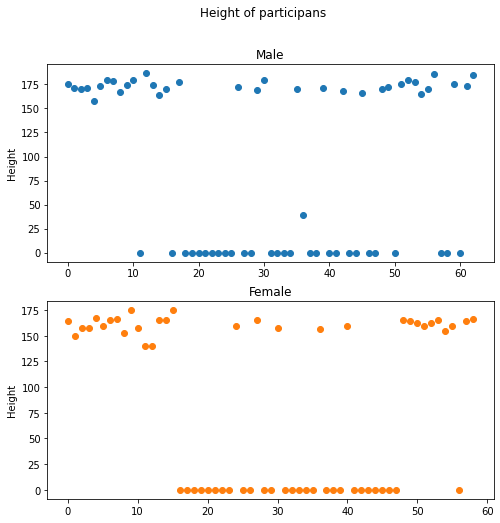

In [61]:
clust_3=data_clust[(data_clust['y']==3)]
plot_height(clust_3)

                                     Наименование файла         ID  \
2113    4030965.mm2.sortdup.bqsr.HaplotypeCaller.vcf.gz    4030965   
2153  4030965V2.mm2.sortdup.bqsr.HaplotypeCaller.vcf.gz  4030965V2   
2187  4030965V3.mm2.sortdup.bqsr.HaplotypeCaller.vcf.gz  4030965V3   

     Направление  Вес  Рост  Полных лет  Пол   clean_id  Row.names ethnic  \
2113     Удалить  NaN   NaN         NaN  NaN    4030965    4030965    Rus   
2153     Удалить  NaN   NaN         NaN  NaN  4030965V2  4030965V2    Rus   
2187     Удалить  NaN   NaN         NaN  NaN  4030965V3  4030965V3    Rus   

            V2        V3  y  
2113 -0.123699 -0.019612  7  
2153 -0.123173 -0.019970  7  
2187 -0.123173 -0.019970  7  


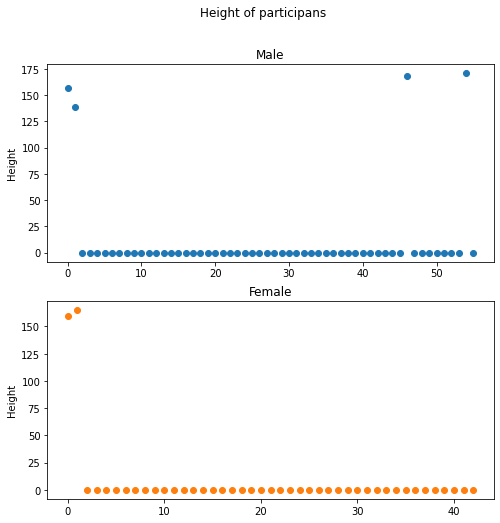

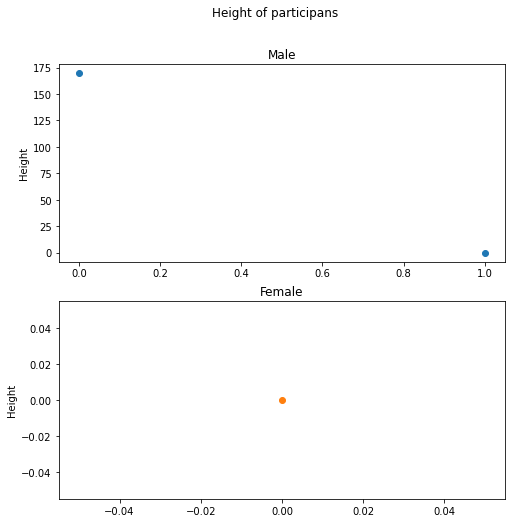

In [64]:
print(data_clust[(data_clust['y']==7)])
plot_height(data_clust[(data_clust['y']==6)])
plot_height(data_clust[(data_clust['y']==8)])

In [13]:
clust = pd.read_csv('data/population/clust_some.tsv', delimiter=',')
height_all = pd.read_csv('data/height/all.pheno', delimiter=' ')
height_clust = clust.merge(height_all, right_on=['IID'], left_on=['Row.names'])
height_clust['cluster'].unique()

array([1, 2, 3])

In [14]:
for i in height_clust['cluster'].unique():
    height_clust[height_clust['cluster'] == i][['FID', 'IID', 'zscore']].to_csv(f'data/height/clust_some/all_{i}.pheno', sep=' ', index=False)

In [15]:
clust = pd.read_csv('data/population/clust_some.tsv', delimiter=',')
height_all = pd.read_csv('data/bmi/all.pheno', delimiter=' ')
height_clust = clust.merge(height_all, right_on=['IID'], left_on=['Row.names'])
height_clust['cluster'].unique()

array([1, 2, 3])

In [16]:
for i in height_clust['cluster'].unique():
    height_clust[height_clust['cluster'] == i][['FID', 'IID', 'zscore']].to_csv(f'data/bmi/clust_some/all_{i}.pheno', sep=' ', index=False)